<a href="https://colab.research.google.com/github/ganeshmittal223/ML-Model/blob/main/Die_Another_Day_102003702_102003710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Die Another Day**


We predict if you are going to die or not and hence trying to give you another chance!!! therefore die another day.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
df['platelets']=mm.fit_transform(df[['platelets']])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,0.290823,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,0.288833,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,0.165960,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,0.224148,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,0.365984,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,0.157474,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,0.296884,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,0.869075,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,0.139290,1.4,140,1,1,280,0


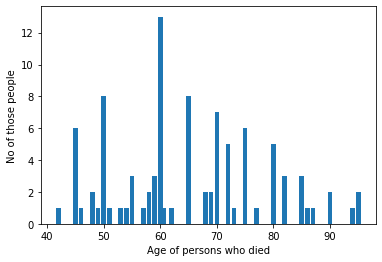

In [ ]:
plt.bar(df[df['DEATH_EVENT']==1].age.value_counts().keys(),df[df['DEATH_EVENT']==1].age.value_counts())
plt.xlabel('Age of persons who died')
plt.ylabel('No of those people')
plt.show()

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

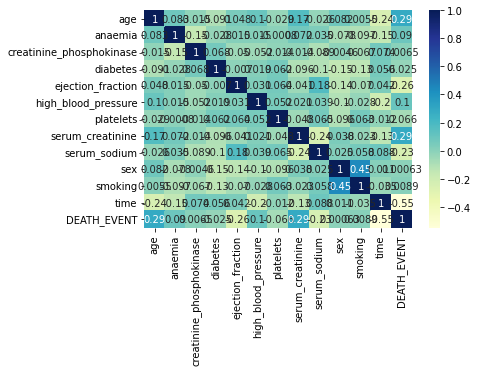

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()


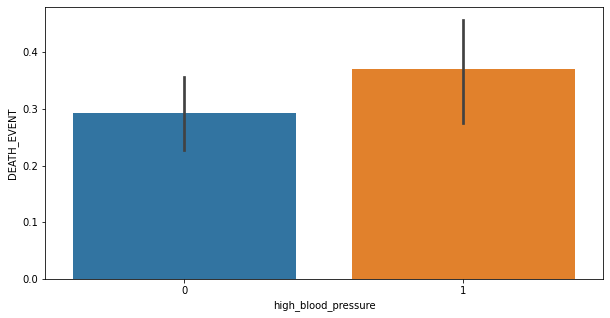

In [ ]:
#Analysing on Month Basis
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='high_blood_pressure',y='DEATH_EVENT')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,0.290823,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,0.288833,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,0.165960,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,0.224148,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,0.365984,2.7,116,0,0,8,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler


mm=MinMaxScaler()
df['creatinine_phosphokinase']=mm.fit_transform(df[['creatinine_phosphokinase']])
df['serum_sodium']=mm.fit_transform(df[['serum_sodium']])
df['age']=mm.fit_transform(df[['age']])

In [ ]:
import scipy.stats as stats
stats.zscore(df['creatinine_phosphokinase'])

0      0.000166
1      7.514640
2     -0.449939
3     -0.486071
4     -0.435486
         ...   
294   -0.537688
295    1.278215
296    1.525979
297    1.890398
298   -0.398321
Name: creatinine_phosphokinase, Length: 299, dtype: float64

In [ ]:
for i in range(10):
    df=df[(stats.zscore(df['creatinine_phosphokinase'],axis=0)<=3) & (stats.zscore(df['creatinine_phosphokinase'],axis=0)>-3)].reset_index(drop=True)
df.shape

(266, 13)

In [ ]:

value = len(df[df.duplicated()])
print('The numbers of duplicate data present in our datatset is:', value )

The numbers of duplicate data present in our datatset is: 0


In [ ]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values
y = df.iloc[:, 12].values

In [ ]:
X


array([[6.36363636e-01, 0.00000000e+00, 7.13192141e-02, ...,
        1.00000000e+00, 0.00000000e+00, 4.00000000e+00],
       [4.54545455e-01, 0.00000000e+00, 1.56927788e-02, ...,
        1.00000000e+00, 1.00000000e+00, 7.00000000e+00],
       [1.81818182e-01, 1.00000000e+00, 1.12273539e-02, ...,
        1.00000000e+00, 0.00000000e+00, 7.00000000e+00],
       ...,
       [4.18181818e-01, 1.00000000e+00, 1.02066854e-02, ...,
        1.00000000e+00, 1.00000000e+00, 2.70000000e+02],
       [4.00000000e-01, 0.00000000e+00, 4.84817555e-03, ...,
        1.00000000e+00, 1.00000000e+00, 2.70000000e+02],
       [1.81818182e-01, 0.00000000e+00, 2.20719571e-02, ...,
        1.00000000e+00, 1.00000000e+00, 2.85000000e+02]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[34,  2],
       [ 5, 13]])

In [ ]:
ac

0.8703703703703703

In [ ]:
error_rate = 1-ac
error_rate

0.12962962962962965

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP) 
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.87179487, 0.86666667])

In [ ]:
Recall

array([0.94444444, 0.72222222])

In [ ]:
Fscore

array([0.90666667, 0.78787879])

In [ ]:
specificity

array([0.72222222, 0.94444444])

In [ ]:
FPR

array([0.27777778, 0.05555556])

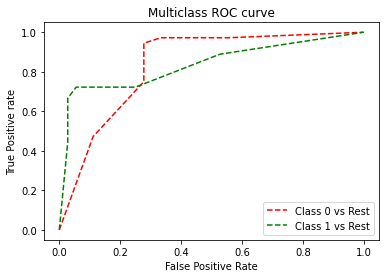

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = classifier.predict(X_test)
pred_prob = classifier.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

**RANDOM FOREST FOR CLASSIFICATION**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12962962962962962
Mean Squared Error: 0.12962962962962962
Root Mean Squared Error: 0.3600411499115478


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[36,  0],
       [ 7, 11]])

In [ ]:
ac

0.8703703703703703

In [ ]:
error_rate=1-ac
error_rate

0.12962962962962965

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP) 
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.8372093, 1.       ])

In [ ]:
Recall

array([1.        , 0.61111111])

In [ ]:
Fscore

array([0.91139241, 0.75862069])

In [ ]:
specificity

array([0.61111111, 1.        ])

In [ ]:
FPR

array([0.38888889, 0.        ])

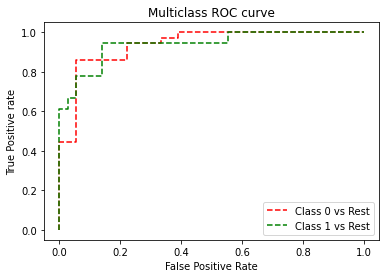

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

**NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
ac

0.8333333333333334

In [ ]:
cm

array([[34,  2],
       [ 7, 11]])

In [ ]:
error_rate = 1-ac
error_rate

0.16666666666666663

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP) 
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.82926829, 0.84615385])

In [ ]:
Recall

array([0.94444444, 0.61111111])

In [ ]:
Fscore

array([0.88311688, 0.70967742])

In [ ]:
specificity

array([0.61111111, 0.94444444])

In [ ]:
FPR

array([0.38888889, 0.05555556])

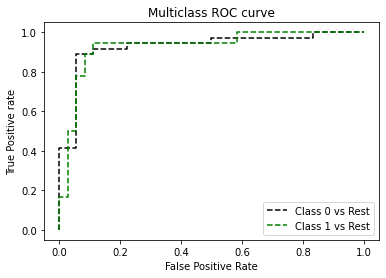

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = classifier.predict(X_test)
pred_prob = classifier.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   


**DECISION TREE USING INFORMATION GAIN**

In [ ]:
from collections import Counter
import math
import os
def entropy(labels):
    entropy=0
    label_counts = Counter(labels)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(labels)
        entropy -= prob_of_label * math.log2(prob_of_label)
    return entropy

def information_gain(starting_labels, split_labels):
    info_gain = entropy(starting_labels)
    for branched_subset in split_labels:
        info_gain -= len(branched_subset) * entropy(branched_subset) / len(starting_labels)
    return info_gain

In [ ]:
def split(dataset, column):
    split_data = []
    col_vals = df[column].unique() # This tree generation method only works with discrete values
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)

In [ ]:
def find_best_split(dataset):
    best_gain = 0
    best_feature = 0
    features = list(dataset.columns)
    features.remove('anaemia')
    for feature in features:
        split_data = split(dataset, feature)
        split_labels = [dataframe['anaemia'] for dataframe in split_data]
        gain = information_gain(dataset['anaemia'], split_labels)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    print(best_feature, best_gain)
    return best_feature, best_gain

new_data = split(df, find_best_split(df)[0]) 

creatinine_phosphokinase 0.6799424517250213


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
ac

0.8333333333333334

In [ ]:
cm

array([[34,  2],
       [ 7, 11]])

In [ ]:
error_rate = 1-ac
error_rate

0.16666666666666663

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP) 
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.82926829, 0.84615385])

In [ ]:
Recall

array([0.94444444, 0.61111111])

In [ ]:
Fscore

array([0.88311688, 0.70967742])

In [ ]:
specificity

array([0.61111111, 0.94444444])

In [ ]:
FPR

array([0.38888889, 0.05555556])

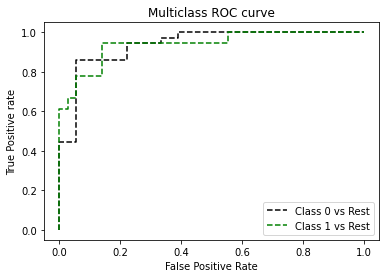

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   


**LINEAR SVM**

In [ ]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values
y = df.iloc[:, 12].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy = svm_model_linear.score(X_test, y_test)

In [ ]:
accuracy

0.8703703703703703

In [ ]:
error_rate = 1-accuracy
error_rate

0.12962962962962965

In [ ]:
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[34,  2],
       [ 5, 13]])

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP) 
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.87179487, 0.86666667])

In [ ]:
Recall

array([0.94444444, 0.72222222])

In [ ]:
Fscore

array([0.90666667, 0.78787879])

In [ ]:
specificity

array([0.72222222, 0.94444444])

In [ ]:
FPR

array([0.27777778, 0.05555556])

**DECISION TREE USING GINI INDEX**

In [ ]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values
y = df.iloc[:, 12].values
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5)
clf_gini.fit(X_train, y_train)
y_pred_train= clf_gini.predict(X_train)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_train,y_pred_train)
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[120,   7],
       [  5,  67]])

In [ ]:
ac

0.9396984924623115

In [ ]:
error_rate = 1-ac
error_rate

0.06030150753768848

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP) 
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.96      , 0.90540541])

In [ ]:
Recall

array([0.94488189, 0.93055556])

In [ ]:
Fscore

array([0.95238095, 0.91780822])

In [ ]:
specificity

array([0.93055556, 0.94488189])

In [ ]:
FPR

array([0.06944444, 0.05511811])

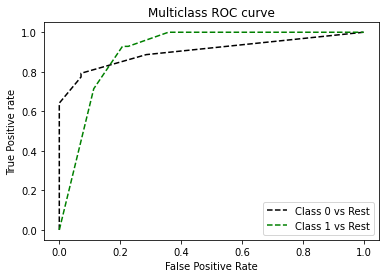

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = clf_gini.predict(X_test)
pred_prob = clf_gini.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

**LOGISTIC REGRESSION WITH REGULARISATION**

In [ ]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values
y = df.iloc[:, 12].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  2],
       [ 3, 13]])

In [ ]:
ac

0.9074074074074074

In [ ]:
error_rate = 1-ac
error_rate

0.09259259259259256

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP) 
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.92307692, 0.86666667])

In [ ]:
Recall

array([0.94736842, 0.8125    ])

In [ ]:
Fscore

array([0.93506494, 0.83870968])

In [ ]:
specificity

array([0.8125    , 0.94736842])

In [ ]:
FPR

array([0.1875    , 0.05263158])

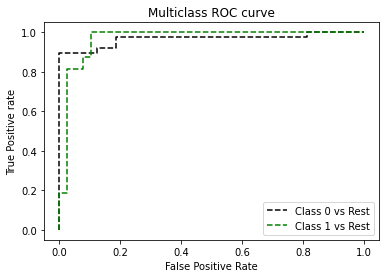

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = logisticRegr.predict(X_test)
pred_prob = logisticRegr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

**Ada Boost Classifier**



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
y_Pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  2],
       [ 3, 13]])

In [ ]:
ac

0.9074074074074074

In [ ]:
error_rate = 1-ac
error_rate

0.09259259259259256

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
specificity = TN/(TN+FP) 
FPR = FP/(FP+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Fscore=2/((1/Precision)+(1/Recall))

In [ ]:
Precision

array([0.92307692, 0.86666667])

In [ ]:
Recall

array([0.94736842, 0.8125    ])

In [ ]:
Fscore

array([0.93506494, 0.83870968])

In [ ]:
specificity

array([0.8125    , 0.94736842])

In [ ]:
FPR

array([0.1875    , 0.05263158])

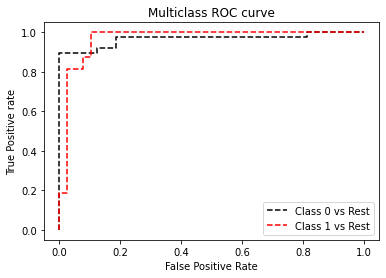

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred = logisticRegr.predict(X_test)
pred_prob = logisticRegr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);